# Assignment #1 - Basic Data Exploration, Visualization, and Analysis

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Grading

This assignment will be graded in two portions:
<ul>
<li> 50% - Correctness and functionality. Parts of the assignment (the functions you are asked to write) will be graded on whether they work correctly and generate correct answers. </li>
<li> 50% -Analysis and presentation. Parts of the assignment (the markdown cells you are asked to fill in) will be graded on whether they present the answers clearly, and whether the analysis is correct. </li>
</ul>

## Load Data

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from asn1_function_sheet import age_splitter
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("LabourTrainingEvaluationData.csv")
except FileNotFoundError:
    df = pd.read_csv("../data/LabourTrainingEvaluationData.csv")
df["Nodeg"].astype('category', copy=False)
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [70]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


### Part 1

<ol>
<li> Create a function called age_splitter that takes a dataframe, a column name, and an age threshold as input. The function should return two dataframes, one with all the rows where the age in the specified column is below the threshold, and one with all the rows where the age in the specified column is above or equal to the threshold. </li>
<li> Use this function to calculate the percentage of people in the dataset that are below 30 years old. </li>
<li> Use this function to compare the 1978 earnings of the two groups to see which is larger - show this arithmatically as well as visually. </li>
</ol>

#### Prob 01: Demo of Function.

In [108]:
below_30_df, above_or_equal_30_df = age_splitter(df, 'Age', 30)
print('below_30_df : ',below_30_df)
print('above_or_equal_30_df : ',above_or_equal_30_df)

below_30_df :         Age          Eduacation      Race         Hisp MaritalStatus  Nodeg  \
1       21        Intermediate  NotBlack  NotHispanic    NotMarried      0   
4       18  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
5       22  LessThanHighSchool  NotBlack  NotHispanic       Married      1   
7       18  LessThanHighSchool  NotBlack  NotHispanic    NotMarried      1   
11      16  LessThanHighSchool  NotBlack  NotHispanic    NotMarried      1   
...    ...                 ...       ...          ...           ...    ...   
15981   22        Intermediate  NotBlack     hispanic    NotMarried      0   
15982   27        Intermediate  NotBlack  NotHispanic       Married      0   
15985   27          HighSchool  NotBlack  NotHispanic       Married      0   
15987   22          HighSchool     black  NotHispanic    NotMarried      0   
15988   20          HighSchool     black  NotHispanic       Married      0   

       Earnings_1974  Earnings_1975  Earnings_19

#### Prob 2: Use this function to calculate the percentage under 30. 

In [110]:
total_people = len(df)
below_30_count = len(below_30_df)
percentage_under_30 = (below_30_count / total_people) * 100
print(f'Percentage of below 30: {percentage_under_30:}%')

Percentage of below 30: 44.7223611805903%


#### Prob 03: 1978 Earnings Comparison - arithmatically

In [111]:
avg_earnings_below_30 = below_30_df['Earnings_1978'].mean()
avg_earnings_above_30 = above_or_equal_30_df['Earnings_1978'].mean()

print("Average 1978 earnings below 30 :",avg_earnings_below_30)
print("Average 1978 earnings 30 or above :",avg_earnings_above_30)

if avg_earnings_below_30 > avg_earnings_above_30 :
    print('People below 30 earned more on average in 1978.')
else:
    print('People 30 or above earned more on average in 1978.')

Average 1978 earnings below 30 : 13032.687089525025
Average 1978 earnings 30 or above : 16314.253781091627
People 30 or above earned more on average in 1978.


#### Prob 03: 1978 Earnings Comparison - visually

In [139]:
print(df.columns)

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')


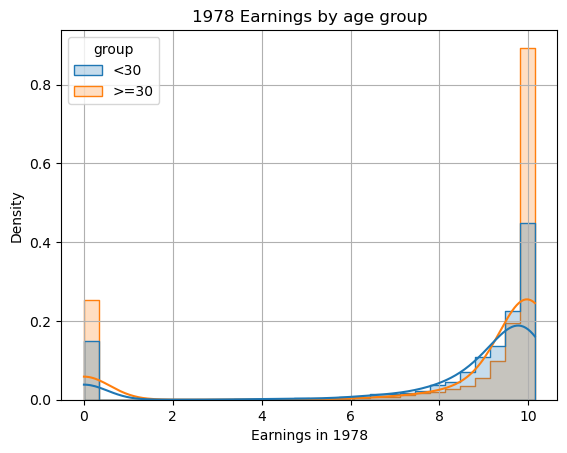

In [148]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

age_col = 'Age'
Earnings_1978 = 'Earnings_1978'

below_30_df = df[df[age_col] <30].copy()
above_or_equal_30_df = df[df[age_col] >=30].copy()

below_30_df['group'] = '<30'
above_or_equal_30_df['group'] = '>=30'

combined_df = pd.concat([below_30_df, above_or_equal_30_df])

combined_df['log_Earnings_1978'] = np.log1p(combined_df['Earnings_1978'])

sns.histplot(
    data=combined_df, 
    x='log_Earnings_1978', 
    hue='group',
    bins=30,
    kde=True, 
    element='step',
    stat='density'
)

plt.title('1978 Earnings by age group')
plt.xlabel('Earnings in 1978')
plt.ylabel('Density')
plt.grid(True)
plt.show()

### Part 2

<ol>
<li>Create a function in the .py file called cohortCompare that takes two arguments - a dataframe and a list of categorical column names. The function should return a dictonary of the key statistics of each numerical columns and counts for categorical columns.</li>
    <ul>
    <li> Mean, Median, Standard Deviation, Min, Max for numerical columns </li>
    <li> Counts for categorical columns </li>
    <li><b>Note:</b> Please use the CohortMetric object to store and manage the statistics for each cohort.</li>
    </ul>
<li> Does this data, at a high level, appear to be representative of the general population of the US in the late 70s? Does it now? Why or why not? </li>
    <ul>
    <li> This does not need to be a long answer or done in increadable depth. This question will generate some demographic profiles of people in the data - does that appear to be similar to the US population at the time? </li>
    <li> Please state how you assessd this. (There isn't one correct answer, the process is more important than the answer) </li>
    </ul>
<li>Print the dictionary returned in a nice-ish way. (Don't go crazy, basic formatting)</li>
</ol>

#### Prob 01: Demo of Function.

In [209]:
def cohortCompare(df: pd.DataFrame, categorical_cols: list) -> dict:
    result = {}

    for col in df.columns:

        if col in categorical_cols:
            result[col] = df[col].value_counts().to_dict()
        elif pd.api.types.is_numeric_dtype(df[col]):
            # Numerical column: create CohortMetric
            metric = CohortMetric(cohort_name=col)
            metric.setMean(df[col])
            metric.setMedian(df[col])
            metric.setStd(df[col])
            metric.setMin(df[col])
            metric.setMax(df[col])
            result[col] = metric
        else:
            # Skip non-categorical, non-numerical columns
            continue
        

    return result

In [193]:
import numpy as np
from asn1_function_sheet import CohortMetric, cohortCompare, cohenEffectSize

    # Convert to numpy arrays and drop NaNs
group1 = np.array(group1).astype(float)
group2 = np.array(group2).astype(float)

group1 = group1[~np.isnan(group1)]
group2 = group2[~np.isnan(group2)]

    # Means and standard deviations
mean1, mean2 = np.mean(group1), np.mean(group2)
std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)

    # Pooled standard deviation
pooled_std = np.sqrt((std1**2 + std2**2) / 2)

    # Cohen's d
if pooled_std == 0:
    return 0.0

    return (mean1 - mean2) / pooled_std

NameError: name 'group1' is not defined

In [156]:
# 1 - Demo of function
from asn1_function_sheet import CohortMetric, cohortCompare
def cohortCompare(df, cohorts, statistics=['mean', 'median', 'std', 'min', 'max']):
    """
    This function takes a dataframe and a list of cohort column names, and returns a dictionary
    where each key is a cohort name and each value is an object containing the specified statistics
    """
    metrics = CohortMetric('Full Dataset')

    num_columns = df.select_dtypes(include='number').columns
    cat_columns = [col for col in cat_columns if col in df.columns]

    for col in num_columns:
        metrics.add_numerical_stats(col, df[col])

    for col in cat_columns:
        metrics.add_categorical_counts(col,df[col])

    return{'Full Dataset': metrics}
cat_cols = df.select_dtypes(include='object').columns.tolist()

results = cohortCompare(df, cat_cols)

print(results['Full Dataset'])

UnboundLocalError: cannot access local variable 'cat_columns' where it is not associated with a value

#### Prob 02: Comparison

In [ ]:
# 2 - Comparison (you could also use a markdown cell for this!!!)


### Part 3

<ol>
<li> Create a function in the .py file called effectSizer that takes in a dataframe, a numerical column name, a column name of a categorical value that is binary (two values only), and returns a dictionary of the categorical classes and their corresponding effect sizes on the numerical value. </li>
<li> For 1978, which of Race, Hisp, MaritalStatus have the largest effect size. (Use Yes/True/1 for x1)</li>
</ol>

#### Prob 01: Demo of Function

In [199]:
from asn1_function_sheet import effectSizer
df = pd.read_csv("labourTrainingEvaluationData.csv")
result = effectSizer(df, "Earnings_1978", "Hisp")
print(result)

None


#### Prob 02: For 1978, which of Race, Hisp, MaritalStatus have the largest effect size. (Use Yes/True/1 for x1)

In [206]:
# 1. Demo of function

import pandas as pd

df = pd.read_csv("labourTrainingEvaluationData.csv")

numeric_col = "Earnings_1978"
binary_cols = ["Race", "Hisp", "MaritalStatus"]

effect_sizes = {}

for col in binary_cols:
    try:
        result = effectSizer(df, numeric_col, col)
        print(f"\nEffect of {col} on {numeric_col}:")
        for k, v in result.items():
            print(f"  {k}: {v:.4f}" if isinstance(v, float) else f"  {k}: {v}")
        effect_sizes[col] = result["Effect Size"]
    except Exception as e:
        print(f"Could not process {col}: {e}")
        return effect_sizes

# Show which column has the largest effect
if effect_sizes:
    max_col, max_val = max(effect_sizes.items(), key=lambda x: abs(x[1]))
    print(f"\nLargest effect on {numeric_col}: {max_col} (Effect Size: {max_val:.4f})")
else:
    print("No valid effect sizes calculated.")

SyntaxError: 'return' outside function (1777272349.py, line 21)